In [3]:
import h5py
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import os

In [23]:
f = h5py.File('muon1000ev_0-1gev_edep.h5')

trajs = f['trajectories']
segs = f['segments']
print(segs.dtype)

ev_n = 9

# getting muon trajectories
muon_mask_trajs = trajs['traj_id'] == 0
muon_trajs = trajs[muon_mask_trajs]
muon_traj = muon_trajs[ev_n]



# for traj in muon_trajs:
#     print(traj['traj_id'])
# for traj in muon_trajs:
#     print(traj['pdg_id'])


# getting segments in muon track only
ev_mask = segs['event_id'] == ev_n #ev_mask is a boolean array, true if that segment is in that trajectory
ev_segs = segs[ev_mask] #only segments in that event

muon_mask = ev_segs['traj_id'] == 0 
non_muon_mask = np.logical_not(muon_mask)
muon_segs = ev_segs[muon_mask] #only segments in primary muon track for that event
non_muon_segs = ev_segs[non_muon_mask]


# for seg in muon_segs:
#     print(seg['traj_id'])
# for seg in muon_segs:
#     print(seg['pdg_id'])



# for seg in non_muon_segs:
#     print(seg['traj_id'])
# for seg in non_muon_segs:
#     print(seg['pdg_id'])
# for seg in non_muon_segs:
#     print(seg['dE'])


{'names': ['event_id', 'vertex_id', 'segment_id', 'z_end', 'traj_id', 'file_traj_id', 'tran_diff', 'z_start', 'x_end', 'y_end', 'n_electrons', 'pdg_id', 'x_start', 'y_start', 't_start', 't0_start', 't0_end', 't0', 'dx', 'long_diff', 'pixel_plane', 't_end', 'dEdx', 'dE', 't', 'y', 'x', 'z', 'n_photons'], 'formats': ['<u4', '<u8', '<u4', '<f4', '<u4', '<u4', '<f4', '<f4', '<f4', '<f4', '<u4', '<i4', '<f4', '<f4', '<f4', '<f8', '<f8', '<f8', '<f4', '<f4', '<i4', '<f4', '<f4', '<f4', '<f4', '<f4', '<f4', '<f4', '<f4'], 'offsets': [0, 8, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 72, 80, 88, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136], 'itemsize': 144}


In [25]:
seg_coords = np.array([[seg['x'], seg['y'], seg['z']] for seg in muon_segs])
seg_starts = np.array([[seg['x_start'], seg['y_start'], seg['z_start']] for seg in muon_segs])
seg_ends = np.array([[seg['x_end'], seg['y_end'], seg['z_end']] for seg in muon_segs])
dxs = np.array([seg['dx'] for seg in muon_segs])
start = muon_traj['xyz_start']
stop = muon_traj['xyz_end']

# naive length
length = np.linalg.norm(stop - start)


# detailed length -------------
path_length = 0
for seg in muon_segs:
    path_length += seg['dx']
pl_vector = (length_vector / np.linalg.norm(length_vector)) * path_length


# for plotting segments
seg_vectors = []
for i in range(len(dxs)):
    if np.linalg.norm(seg_ends[i] - seg_starts[i]) == 0:
        seg_vectors.append([0, 0, 0])
    else: 
        seg_vector = ((seg_ends[i] - seg_starts[i]) / np.linalg.norm(seg_ends[i] - seg_starts[i])) * dxs[i]
        seg_vectors.append(seg_vector.tolist())

seg_vectors = np.array(seg_vectors)



print(start)
print(stop)
print()
print(seg_starts)
print()
print(seg_ends)
print()
print(dxs)

# print()
# print(len(seg_starts))

print(length)
print(path_length)


[ 283.83444 -437.61276 -632.9671 ]
[ 278.80432 -418.25156 -743.5847 ]

[[ 283.83444 -437.61276 -632.9671 ]
 [ 283.81494 -437.5345  -633.33093]
 [ 283.38998 -435.9719  -640.7274 ]
 [ 283.2345  -434.87045 -646.20825]
 [ 282.7073  -432.50168 -657.455  ]
 [ 282.69666 -432.4352  -657.81354]
 [ 282.67252 -432.2795  -658.6977 ]
 [ 282.63675 -431.69186 -661.8324 ]
 [ 282.61856 -431.5748  -662.4645 ]
 [ 282.57047 -431.24084 -664.40607]
 [ 282.4435  -430.6166  -667.89526]
 [ 282.42316 -430.3967  -669.2519 ]
 [ 282.112   -428.21112 -683.5712 ]
 [ 282.07288 -428.00262 -684.5837 ]
 [ 282.0237  -427.7561  -685.8054 ]
 [ 281.96704 -427.59735 -686.6991 ]
 [ 281.78278 -427.26117 -688.6855 ]
 [ 281.70782 -427.12643 -689.5824 ]
 [ 281.34528 -426.45673 -693.95844]
 [ 281.0008  -425.98648 -697.5801 ]
 [ 280.66312 -425.38712 -702.7604 ]
 [ 280.23608 -424.78864 -707.66   ]
 [ 279.38837 -424.019   -715.04443]
 [ 279.22147 -423.82712 -716.7122 ]
 [ 278.95786 -423.50192 -719.44293]
 [ 278.91135 -423.4387  -720.

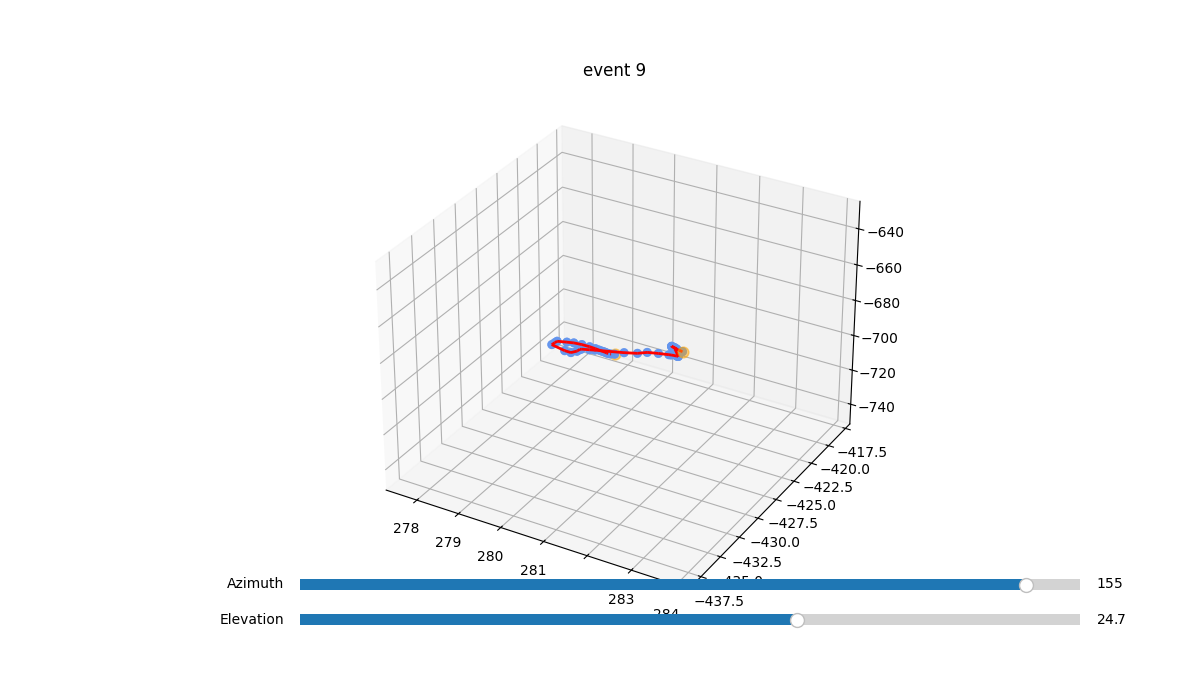

In [26]:
%matplotlib widget
from matplotlib.widgets import Slider


fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f'event {ev_n}')


        
# segment by segment plotting
# ax.scatter(seg_starts[0][0], seg_starts[0][1], seg_starts[0][2], marker='o', s=10, color='red', alpha=0.8)
# ax.scatter(seg_ends[0][0], seg_ends[0][1], seg_ends[0][2], marker='o', s=10, color='red', alpha=0.8)
# ax.quiver(seg_starts[0][0], seg_starts[0][1], seg_starts[0][2], seg_vectors[0][0], seg_vectors[0][1], seg_vectors[0][2], arrow_length_ratio = 0.01, color = 'red')
# ax.quiver(seg_starts[1][0], seg_starts[1][1], seg_starts[1][2], seg_vectors[1][0], seg_vectors[1][1], seg_vectors[1][2], arrow_length_ratio = 0.01, color = 'blue')
# ax.scatter(seg_starts[1][0], seg_starts[1][1], seg_starts[1][2], marker='o', s=10, color='blue', alpha=0.8)
# ax.scatter(seg_ends[1][0], seg_ends[1][1], seg_ends[1][2], marker='o', s=10, color='blue', alpha=0.8)
# ax.scatter(seg_starts[2][0], seg_starts[2][1], seg_starts[2][2], marker='o', s=10, color='orange', alpha=0.8)
# ax.scatter(seg_ends[2][0], seg_ends[2][1], seg_ends[2][2], marker='o', s=10, color='orange', alpha=0.8)

# comparing start/stops
ax.scatter(seg_starts[:, 0], seg_starts[:, 1], seg_starts[:, 2], marker='o', s=30, color='cornflowerblue', alpha=0.8)
ax.scatter(seg_ends[:, 0], seg_ends[:, 1], seg_ends[:, 2], marker='o', s=30, color='cornflowerblue', alpha = 0.8)
ax.scatter(start[0], start[1], start[2], color='orange', marker='o', s=60, alpha=0.5)
ax.scatter(stop[0], stop[1], stop[2], color='orange', marker='o', s=60, alpha=0.5)



ax.quiver(seg_starts[:, 0], seg_starts[:, 1], seg_starts[:, 2], seg_vectors[:, 0], seg_vectors[:, 1], seg_vectors[:, 2], arrow_length_ratio=0.01, color='red', linewidths=2)


# sliders
#Slider axes: [left, bottom, width, height]
ax_elev = plt.axes([0.25, 0.1, 0.65, 0.03])
ax_azim = plt.axes([0.25, 0.15, 0.65, 0.03])


slider_elev = Slider(ax_elev, 'Elevation', -90, 90, valinit=24.7)
slider_azim = Slider(ax_azim, 'Azimuth', -180, 180, valinit=155)


def update(val):
   ax.view_init(elev=slider_elev.val, azim=slider_azim.val)
   fig.canvas.draw_idle()

slider_elev.on_changed(update)
slider_azim.on_changed(update)

plt.show()
